## Disjoint Set
### Overview
* disjoint set as a data structure
  + The primary use of disjoint sets is to address the connectivity between the components of a network
    + to quickly check if two vertices are connected
  + also known as union-find
* terminologies
  + parent node: the direct parent node of a vertex
  + root node: a node without a parent node. can be considered as the praent node of itself

### Implementation
* find function finds the root node of a given vertex
* union function unions two vertices and makes their root nodes the same
#### implementation of Quick Find
* time complexity of find function will be O(1)
* time complexity of union function will be O(N)
* the basic idea is to maintain a root array that keeps the roots for all elements
* when we union two nodes, we first check if they have the same root, if not, then we traverse root array, and modify the root of all the elements having node y as their root to x
* in most cases, the find and union will be O(N),and connecting N nodes will be O(N^2)
  + by doing this, all elements having node y as the root will now have x as their root, including node y
```python
# UnionFind class
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]

    def find(self, x):
        return self.root[x]
		
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            for i in range(len(self.root)):
                if self.root[i] == rootY:
                    self.root[i] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)
```


#### implementation of Quick Union
* the time complexity of the union function is O(N) in the worst case, but on average better than it
* the find function is O(N) in the worst case
* to connect N nodes takes <= O(N^2). On average, quick union is better than quick find
* quick union form certain hierarchy of chains, but it is possible for all vertices to form a line

In [ ]:
# UnionFind class
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]

    def find(self, x):
        while x != self.root[x]:
            x = self.root[x]
        return x

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.root[rootY] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)

#### Union by rank
* the purpose of union by rank is to spread the tree and decrease its height
* rank refers to the height of each vertex
* when union two nodes, we use the vertex with higher rank as the parent node of the lower one, and therefore, reduce or maintain the overall lower height of the vertices
  + when union a rank 3 vertex with a rank 2 vertex, if we use the rank 3 one as the parent node, then the height of the joined disjoint set is 3, otherwise it is 4. Therefore, using the higher rank vertex as parent node decrease the overall height of the set  
  + when the two vertices have the same rank, use any of them as the parent node, and then increment its rank after union
* time complexity
  + worse case is that we repeatedly union components of equal rank, the tree height will be at most log(N)+1, so find operation is O(log(N)) in worst case
  + union will be O(log(N)) since it use find()
  + O(N) for constructor

In [ ]:
# union by rank
# UnionFind class
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size

    def find(self, x):
        while x != self.root[x]:
            x = self.root[x]
        return x
 
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)

#### Path compression optimization
* to further decrease the tree height, after finding the root node, we udate the parent node of all travesed elements to their root node
  + the recursive chain keep going up to the root element
* this effectively decrease the height of the tree, actually, there are only two possiblities:
  + the node is the root of its branch, where x = root\[x\]
  + the node has another node as its parent, where you only need two recursive run to find root
  + note that this only happens when we search the node again. The building process still may take O(N), although it is rare
* notice the different implementation in find(x) where we don't use while loop, but a if statement as base case, and recursively call find(root\[x\]) to find root, and set the root\[x\] to returned root node, and then return the root node
* we don't use the union by rank in this implementation, and therefore, the worst case could have O(N) for find() when building the chain
* Time complexity
  + constructor O(N)
  + find O(logN) on average, worst case O(N)
  + union O(logN) on average, worst case O(N)
  + connected O(logN) on average, worst case O(N)

In [ ]:
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]

    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
 
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.root[rootY] = rootX

    def connected(self, x, y):
        return self.find(x) == self.find(y)

#### optimized disjoint set with path compression and union by rank
* here we combine the path compression in find() and union by rank in union()
* time complexity
  + constructor O(N)
  + find: O(alpha(N)) on average, regarded as O(1)
  + union and connect: O(alpha(N)) on average, regarded as O(1)

In [1]:
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        # Use a rank array to record the height of each vertex, i.e., the "rank" of each vertex.
        # The initial "rank" of each vertex is 1, because each of them is
        # a standalone vertex with no connection to other vertices.
        self.rank = [1] * size

    # The find function here is the same as that in the disjoint set with path compression.
    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]

    # The union function with union by rank
    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

    def connected(self, x, y):
        return self.find(x) == self.find(y)


#### Leetcode 547
* Overview
  + There are n cities. Some of them are connected, while some are not. If city a is connected directly with city b, and city b is connected directly with city c, then city a is connected indirectly with city c.
  + A province is a group of directly or indirectly connected cities and no other cities outside of the group.
  + You are given an n x n matrix isConnected where isConnected[i][j] = 1 if the ith city and the jth city are directly connected, and `isConnected[i][j]` = 0 otherwise.
  + Return the total number of provinces.
* we can use Union_Find to solve this problem. The key points:
  + the length of isConnected matrix is the number of cities, which is the size of UF
  + straightforward to use UF. Union two points when isConnected\[i\]\[j\]==1
  + it is better to set a count that initialized to the size of islands, and each time a union is called to join two points, decrement this value
  + return the count as results
  + we can use the count of root nodes, but in case a node doesn't update its parent node, we get incorrect results
  

In [2]:
from typing import List
class UnionFind:
    def __init__(self, size: int):
        self.rank = [1] * size
        self.root = [ i for i in range(size)]
        
        # initialize count as the number of independent island
        self.count = size
        
    def find(self, x) -> int:
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    
    # decrease count after each union
    def union(self, x, y) -> None:
        rootX = self.find(x)
        rootY = self.find(y)
        
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootX] = rootY
                self.rank[rootY] += 1
            self.count -= 1    
                
    def connect(self, x, y) -> bool:
        return self.find(x) == self.find(y)
    
    def get_count(self) -> int:
        return self.count

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        if not isConnected or not isConnected[0]:
            return 0
        
        size = len(isConnected)
        uf = UnionFind(size)
        
        for i in range(size):
            for j in range(i+1, size):
                if isConnected[i][j] == 1:
                    uf.union(i, j)
                    
        return uf.get_count()   

#### Leetcode 261
* Overview
  + You have a graph of n nodes labeled from 0 to n - 1. You are given an integer n and a list of edges where edges`[i] = [ai, bi]` indicates that there is an undirected edge between nodes ai and bi in the graph.
  + Return true if the edges of the given graph make up a valid tree, and false otherwise.
  
* a tree is a fully connected graph without repeated edges
  + the tree should have only one root node, which can be implemented by union() to decrement count
  + the number of unrepeated edges should equals to n-1
    + if the length of edges does not equal to n-1, return False
    + if the length of edges is bigger than n-1, there are repeated edges
    + if the length of the edges is smaller than n-1, the graph is not fully connected  
* there is no need to check the repeated edges, since the problem has the constraint that "There are no self-loops or repeated edges." 
* Time complexity 
  + O(N) for typical UF operations
* space complexity
  + O(N) to store the root and rank lists

In [3]:
class UnionFind:
    def __init__(self, size: int):
        self.root = [i for i in range(size)]
        self.rank = [1] * size
        self.count = size
        
    def find(self, x) -> int:
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    
    def union(self, x, y) -> None:
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x != root_y:
            if self.rank[root_x] > self.rank[root_y]:
                self.root[root_y] = root_x
            elif self.rank[root_x] < self.rank[root_y]:
                self.root[root_x] = root_y
            else:
                self.root[root_x] = root_y
                self.rank[root_y] += 1
            self.count -= 1
            
    def get_count(self) -> int:
        return self.count

class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        if n == 0 or len(edges) != n-1:
            return False
        
        uf = UnionFind(n)
        for (a, b) in edges:
            uf.union(a, b)
        
        return uf.get_count() == 1   

#### Leetcode 1202 Smallest String With Swaps
* Overview
  + You are given a string s, and an array of pairs of indices in the string pairs where pairs`[i] = [a, b]` indicates 2 indices(0-indexed) of the string.
  + You can swap the characters at any pair of indices in the given pairs any number of times.
  + Return the lexicographically smallest string that s can be changed to after using the swaps.
  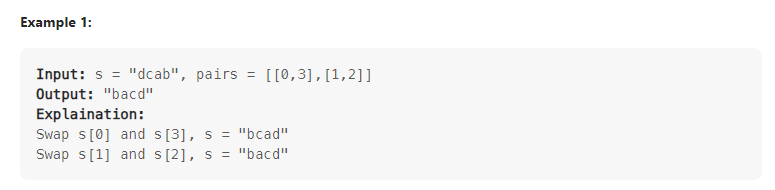
* the key points are the following:
  + we use the unionfind to connect all the pairs as the indices of the input string
  + we then traverse the input string by both index and char. and find the root of each index
  + we store the index and char of the input string to the corresponding defaultdicts using the root index as key
  + we then travers the two defaultdicts, retrieve the index and char lists, and sort them
    + this step swap the index and chars so that the sorted indices and chars under the same root keys are pairs to insert to the char array as the recombined copy of original string
  + we then insert the chars from the sorted char list to the corresponding index defined by the sorted index list
  + we finally join the sorted char list 
* time complexity
  + we will connect all the edges in the pairs, which is O(E). We also sort the vetices, which is O(VlogV) so time complexity is O(E + VlogV)
  + space complexity: O(V)
  ```python
     # traverse the input string, and aggregate the chars and indices 
     # using the root index of each collections. Then store them in
     # defaultdicts        
     for i, char in enumerate(s):
        root_index = uf.find(i)
        char_dict[root_index].append(char)
        index_dict[root_index].append(i)
        
    # prepare empty string list for output
    rs = [""] * n
    
    # retrieve the char and index lists, sort them
    # and define the output string list using the 
    # sorted index and char lists
    for key, value in char_dict.items():
        value.sort()
        index_dict[key].sort()
        for (i, char) in zip(index_dict[key], value):
            rs[i] = char
    return "".join(rs)        
    ```

In [ ]:
class UnionFind:
    def __init__(self, size:int):
        self.root = [i for i in range(size)]
        self.rank = [1] * size
        
    def find(self, x) -> int:
        if self.root[x] == x:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    
    def union(self, x, y)-> None:
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x != root_y:
            if self.rank[root_x] > self.rank[root_y]:
                self.root[root_y] = root_x
            elif self.rank[root_x] < self.rank[root_y]:
                self.root[root_x] = root_y
            else:
                self.root[root_x] = root_y
                self.rank[root_y] += 1             
                
    
class Solution:
    def smallestStringWithSwaps(self, s: str, pairs: List[List[int]]) -> str:
        if not pairs or not s:
            return s
        char_dict = defaultdict(list)
        index_dict = defaultdict(list)
        
        n = len(s)
        uf = UnionFind(n)
        
        for start, end in pairs:
            uf.union(start, end)
            
        for i, char in enumerate(s):
            root_index = uf.find(i)
            char_dict[root_index].append(char)
            index_dict[root_index].append(i)
        rs = [""] * n
        for key, value in char_dict.items():
            value.sort()
            index_dict[key].sort()
            for (i, char) in zip(index_dict[key], value):
                rs[i] = char
        return "".join(rs)  

#### Leetcode 399 Evaluate Division
* Overview
  + You are given an array of variable pairs equations and an array of real numbers values, where `equations[i] = [Ai, Bi]` and `values[i]` represent the equation Ai / Bi = `values[i]`. Each Ai or Bi is a string that represents a single variable.
  + You are also given some queries, where `queries[j] = [Cj, Dj]` represents the jth query where you must find the answer for `Cj / Dj = ?`.
  + Return the answers to all queries. If a single answer cannot be determined, return -1.0.
  + Note: The input is always valid. You may assume that evaluating the queries will not result in division by zero and that there is no contradiction.
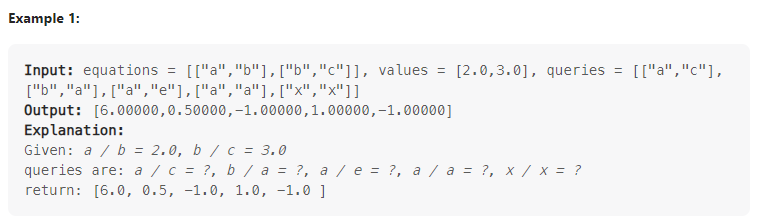
* use union find.
* since the equation has defined which one is the root, we don't use rank order to decide the root
* the idea is simple, if a and b are connected, return their weight ratio, and the weights are both relative to the root element. Otherwise return -1
* if any of a, b are not in the self.root, return -1
* in find(x), if x is not in self.root, set `[x, 1]`
  + if x is its own root, return `self.root[x]`
  + otherwise, recursively call find(parent)
    + set the root element of x to be the final root
    + update the weights from the upper level parent
* in union(x, y, value)
  + get `root_x`, `weight_x`, and `root_y`, `weight_y` 
  + if x and y are connected, do nothing
  + otherwise, set the root of `root_x` to be `root_y`, and `root_x`'s weight to be `value * weight_y/weight_x`
  + the weight of x will also be recursively updated
  
* time complexity
  + we only use the path compression without rank optimization, so each union/find will take O(logN) to build the union. Overall, it will take O(NlogN) to build the union. To query the result, each time the find() will take log(N), and overall, it will take O(MlogN) for queries. So total time complexity is O((M+N)logN)
  
* space complexity
  + O(N) to store union

In [ ]:
class UnionFind:
    def __init__(self):
        self.root = dict()        
        
    def find(self, x: str) -> [str, float]:
        if x not in self.root:
            self.root[x] = [x, 1]           
        else:
            parent, weight = self.root[x]
            if parent != x:
                self.root[x][0], factor = self.find(parent)
                self.root[x][1] *= factor
        return self.root[x]
            
    def union(self, x, y, value) -> None:
        root_x, weight_x = self.find(x)
        root_y, weight_y = self.find(y)
        
        if root_x != root_y:
            self.root[root_x] = [root_y, value * weight_y/weight_x]
        
    def query(self, x, y) -> float:
        if x not in self.root or y not in self.root:
            return -1
        root_x, weight_x = self.find(x)
        root_y, weight_y = self.find(y)
        
        if root_x != root_y:
            return -1
        return weight_x / weight_y               
    

class Solution:
    def calcEquation(self, equations: List[List[str]], values: List[float], queries: List[List[str]]) -> List[float]:
        if not equations or not equations[0] or not queries or not queries[0]:
            return []
        rs =[]
        
        uf = UnionFind()
        for (a, b), value in zip(equations, values):
            uf.union(a, b, value)
            
        for a, b in queries:
            rs.append(uf.query(a, b))
            
        return rs    
            

#### Leetcode 1168 Optimize Water Distribution in a Village
* Overview
  + There are n houses in a village. We want to supply water for all the houses by building wells and laying pipes.
  + For each house i, we can either build a well inside it directly with cost `wells[i - 1]` (note the -1 due to 0-indexing), or pipe in water from another well to it. The costs to lay pipes between houses are given by the array pipes where each `pipes[j] = [house1j, house2j, costj]` represents the cost to connect house1j and house2j together using a pipe. Connections are bidirectional, and there could be multiple valid connections between the same two houses with different costs.
  + Return the minimum total cost to supply water to all houses.
* add a virtual house at index of 0, all costs to build well is the edge/pipe between house 0 and each real house
  + we build the wells list to reflect this, and extend pipes list to include well list
  + sort the new list by cost, so we will preferably use the low cost to add houses to the system
* implement a classic UnionFind class
* if there is a connection, return 1 else 0 from union()
* if the count is 1, meaning all the houses have been considered, jump out of the for loop and return the result 

In [ ]:
class UnionFind:
    def __init__(self, size):
        self.count = size
        self.root = [i for i in range(size)]
        self.rank = [1] * size
        
    def find(self, x) -> int:
        if self.root[x] == x:
            return x
        self.root[x] = self.find(self.root[x])
        return self.root[x]
    
    def union(self, x, y) -> int:
        root_x = self.find(x)
        root_y = self.find(y)
        
        if root_x == root_y:
            return 0
        
        if self.rank[root_x] > self.rank[root_y]:
            self.root[root_y] = root_x
        elif self.rank [root_x] < self.rank[root_y]:
            self.root[root_x] = root_y
        else:
            self.root[root_x] = root_y
            self.rank[root_y] += 1
        self.count -= 1
        return 1  
    
    def get_count(self):
        return self.count   
    
class Solution:
    def minCostToSupplyWater(self, n: int, wells: List[int], pipes: List[List[int]]) -> int:
        wells = [[0, i+1, wells[i]] for i in range(len(wells))]
        pipes.extend(wells)
        pipes.sort(key=lambda x: x[2])
        
        uf = UnionFind(n+1)
        rs = 0
        
        for start, end, cost in pipes:
            rs += uf.union(start, end) * cost            
            if uf.get_count() == 1:
                return rs
        return rs    
            

In [1]:
a = {i: (i, 1) for i in range(5)}

In [2]:
a

{0: (0, 1), 1: (1, 1), 2: (2, 1), 3: (3, 1), 4: (4, 1)}

In [10]:
eqs =[[1, 2], [3, 4], [5, 6]]
vals = [7, 8, 9]

# unpack lists using ()
for (a, b), c in zip(eqs, vals):
    print(a, b, c)

In [5]:
# defaultdict will only generate entries when qeury or set that entry
from collections import defaultdict
b = defaultdict(list)
b[3].append('d')
b[3].append('b')
b[2].append('c')
b[2].append('a')
b[4]
b

defaultdict(list, {3: ['d', 'b'], 2: ['c', 'a'], 4: []})

In [16]:
# assing values to a list must use list
# get output as a list
rs = [0, 1]
print(rs)

# get results as tuple
rs = 0, 1
print(rs)

[0, 1]
(0, 1)


In [21]:
a = [1, 2, 3]
b = [4, 5, 6]
c = a.extend(b)
print(c)
print(a)

None
[1, 2, 3, 4, 5, 6]


In [11]:
rs =[""] * 5

In [12]:
rs

['', '', '', '', '']

In [13]:
rs[0] ='a'

In [14]:
rs

['a', '', '', '', '']